In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')

In [5]:
movie.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
movie.isna().sum()


,0
movieId,0
title,0
genres,0


In [10]:
rating.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [12]:
len(movie)

9742

In [13]:
len(rating)

100836

In [14]:
data = pd.merge(movie, rating, on='movieId')

In [15]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [16]:
data['year'] = data['title'].str.extract(r'\((\d{4})\)')
data['year'] = pd.to_numeric(data['year'], errors='coerce')

In [17]:
data.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995.0


In [18]:
data = data.dropna(subset=['year'])

In [19]:
#avg rating by genre
data['genres'] = data['genres'].str.split('|')
genre_data = data.explode('genres')
genre_rating = genre_data.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(genre_rating)

genres
Film-Noir             3.920115
War                   3.808294
Documentary           3.797785
Crime                 3.658294
Drama                 3.656168
Mystery               3.632460
Animation             3.629937
IMAX                  3.618335
Western               3.583938
Musical               3.563678
Adventure             3.508609
Romance               3.506511
Thriller              3.493723
Fantasy               3.491001
Sci-Fi                3.455851
Action                3.447978
Children              3.412956
Comedy                3.384721
(no genres listed)    3.378378
Horror                3.258195
Name: rating, dtype: float64


In [20]:
#ratings by year
year_rating = data.groupby('year')['rating'].mean()
print(year_rating)

year
1902.0    3.500000
1903.0    2.500000
1908.0    4.000000
1915.0    2.000000
1916.0    3.600000
            ...   
2014.0    3.512879
2015.0    3.410386
2016.0    3.387261
2017.0    3.578091
2018.0    3.483516
Name: rating, Length: 106, dtype: float64


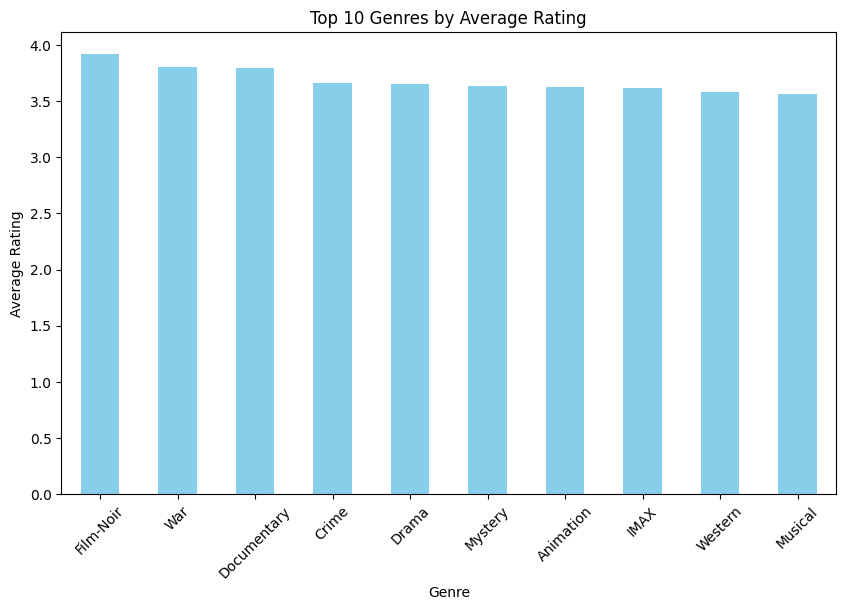

<Figure size 640x480 with 0 Axes>

In [25]:
#top 10genre by rating
plt.figure(figsize=(10, 6))
genre_rating.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()
plt.savefig('genre_rating.png')

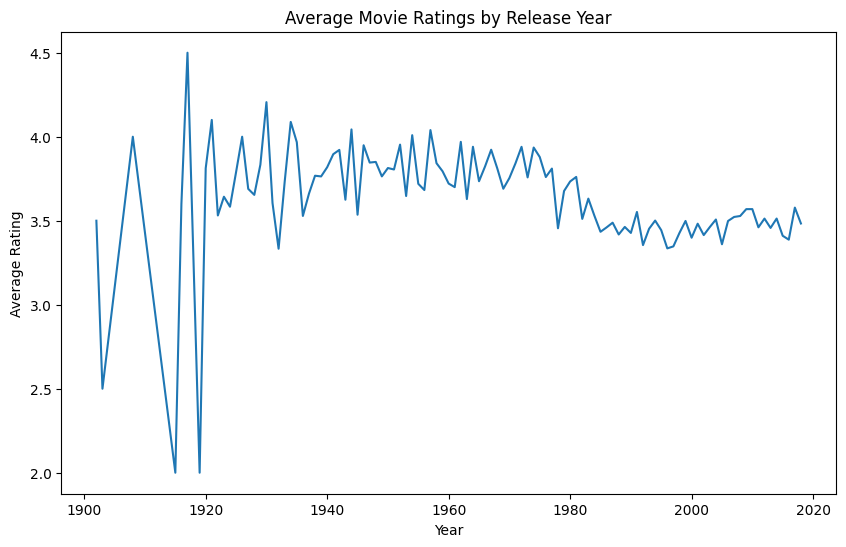

In [24]:
plt.figure(figsize=(10, 6))
year_rating.plot()
plt.title('Average Movie Ratings by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.savefig('year_ratings.png')  # Save for LinkedIn
plt.show()